# Titanic: Machine Learning from Disaster

### Introduction

This is my solution from the famous titanic problem.In this challenge, They ask to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### Steps

The solution is divided into number of steps:

1.Acquire training and test set.

2.Discover and analyze the data

3.Perform data wrangling, cleaning and Extract new features

4.Model, predict and solve the problem

5.Draw conclusions

First let's import the important packages that we will use in this problem

In [51]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
#import tensorflow as tf

#### Step 1:Acquire training and test set.

First of all let's load our training and test sets required to solve the problem.


In [4]:
training_path='Titanic/train.csv'
testing_path='Titanic/test.csv'
train=pd.read_csv(training_path)
test=pd.read_csv(testing_path)
#instead of merging the two sets in order to perform cleaning on them, we put them in a list and loop through them
combined=[train,test]

#### Step 2:Discover and analyze the data

We can check the features' description from [here](https://www.kaggle.com/c/titanic/data), but at the meantime let's print the columns here.

In [5]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can divide the features into 2 features:

1.Numeric features: These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

example:Age, Fare, SibSp,Parch.

2.Catogrical features: These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

example: Survived, Pclass, Sex, Embarked.

There is also alphanumeric types such as Ticket and Cabin.

Let's go deeper with the data to explore more interesting facts

In [7]:
print(train.info())
print('-'*40)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pass

##### Observations

1.Features like Cabin, Age and Embarked have null values in the training set.

2.Features like Cabin, Age and Fare have null values in the test set.

these null values needs to be corrected by replacing them with valid values.

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Observations

1.There are 38% from passenger who actually survived!

2.Most passengers' ages ranged from 20 to 38 years old.

3.Few who paid the most expensive fare(512).

In [9]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Flynn, Mr. James",male,1601,B96 B98,S
freq,1,577,7,4,644


#### Observations

1.Most of the passerngers were males.

2.Most of the passengers travelled from the same port(Southampton). 

#### Assumptions

Now after seeing the data we must decide which features should we use in order to minimize the features to optimize the model.

1.Drop the PassengerId,Ticket columns as it doesn't contribute in the survival rate.

2.Drop the Cabin column because of the amount of missing values in it.

3.Create new feature from the Name column(Title for example).

4.Merge the Parch and SibSp columns into 1 feature(Family).

5.Replace the null values in Age and Emarked columns.

6.Test some assumptions about feartures correlating with the survival rate.

#### Correlating features using pivoting

We can try correlating features with each other in order to find pattern between them.

Let's start with the Pclass column.

In [10]:
train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=0)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


We see that 62% from the passengers in the Pclass had survived.

Decision: Add PClass in the features used in the model.

In [11]:
train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=0)

,Sex,Survived
0,female,0.742038
1,male,0.188908


We see that most of the survived passengers were actually women.

#### Analyze by plotting

Percentage By Survival

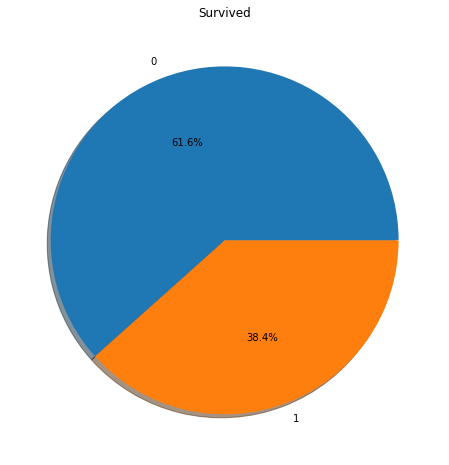

In [15]:
plt.figure(figsize=(18,8))
train['Survived'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True);
plt.title('Survived');
plt.ylabel('');

We Compute the Survival Rate by Gender

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


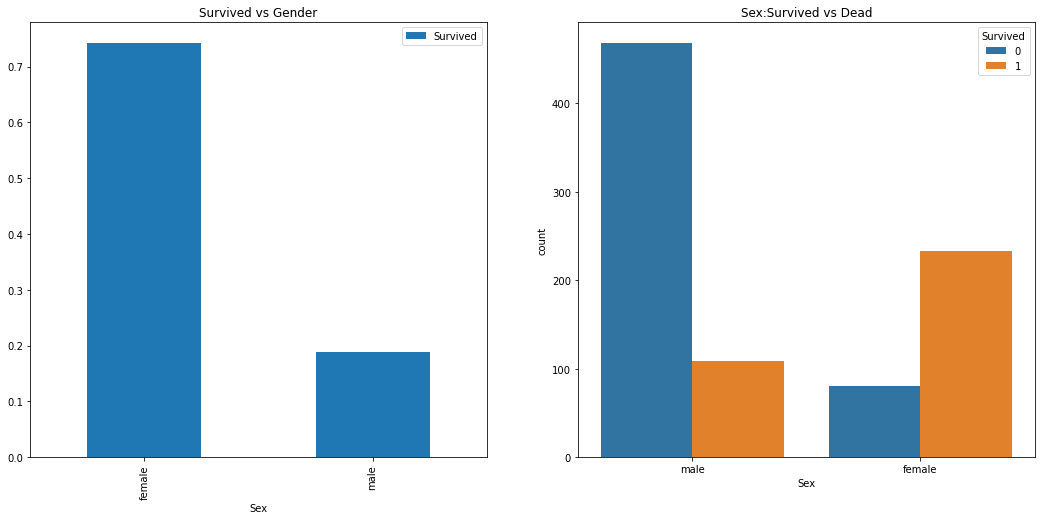

In [16]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Gender')
sns.countplot('Sex',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

Survival rate by PClass

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


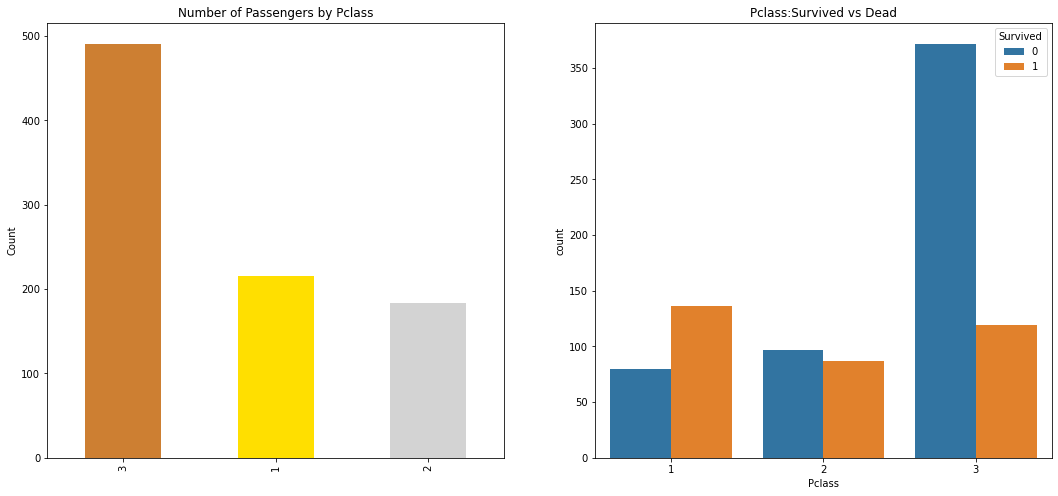

In [17]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

We can numerical features for corrleation with each other.

<Figure size 1008x864 with 0 Axes>

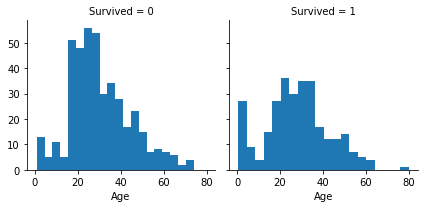

In [18]:
plt.figure(figsize=(14,12))
g=sns.FacetGrid(train,col='Survived')
g.map(plt.hist,'Age',bins=20)

#### Observation

1.Most of the children survived.

2.Passengers between 17 and 40 didn't survive.

3.Passengers that were older than 65 survived.

<Figure size 1008x864 with 0 Axes>

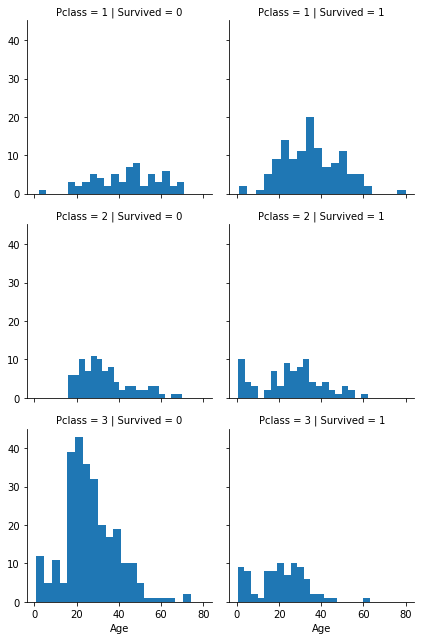

In [11]:
plt.figure(figsize=(14,12))
g=sns.FacetGrid(train,col='Survived',row='Pclass')
g.map(plt.hist,'Age',bins=20)

This confirm our assumptions above:

1.Most PClass 1 passengers had survived, while 3 not.

2.Infant people in Pclass 2 & 3 mostly survived.


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


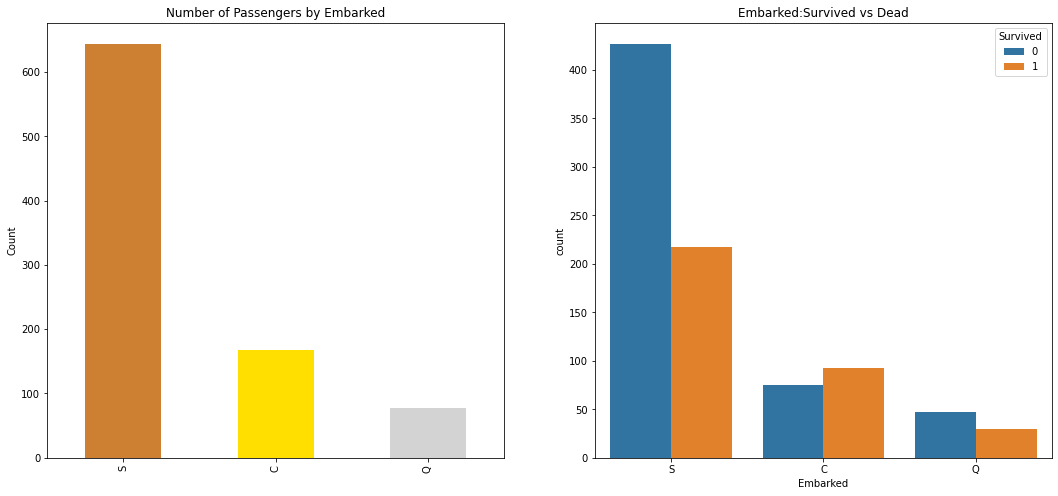

In [19]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Embarked'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers by Embarked')
ax[0].set_ylabel('Count')
sns.countplot('Embarked',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Embarked:Survived vs Dead')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1008x864 with 0 Axes>

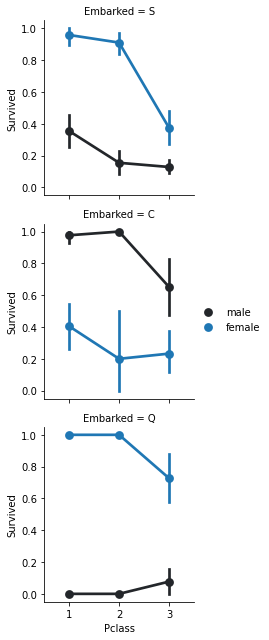

In [20]:
plt.figure(figsize=(14,12))
g=sns.FacetGrid(train,row='Embarked')
g.map(sns.pointplot,'Pclass','Survived','Sex')
g.add_legend()

#### Observation

1.Except for Embarked C, women had more chances in surviving more than men.



### Step 3 :  Wrangling and cleaning data

Now we need to prepare the data to be ready for the model by filling any missing values and extract new features to make the model more accurate.

We start by dropping the cabin and ticket columns as they are not needed.

In [21]:
train=train.drop(['Cabin','Ticket'],axis=1)
test=test.drop(['Cabin','Ticket'],axis=1)
combined=[train,test]

In [22]:
train.shape,test.shape

((891, 10), (418, 9))

Instead of the names we can use the title of each passenger as it may gives us insights ,for example : the wealthy passengers might have more chances in survival.

We will use regular expressions.

In [23]:
for dataset in combined:
    dataset['Title']=dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)
    
pd.crosstab(train.Title,train.Sex)    

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


From the table we can minimize the number of titles in order to make the mapping easier.

In [24]:
for dataset in combined:
    dataset['Title']=dataset['Title'].replace(['Capt','Col','Don','Countess','Dr','Jonkheer','Lady','Major','Sir','Rev'],'Rare')
    dataset['Title']=dataset['Title'].replace(['Mlle','Ms'],'Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Miss')
train[['Title','Survived']].groupby('Title',as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.704301
2,Mr,0.156673
3,Mrs,0.792000
4,Rare,0.347826


In [25]:
title_mapping={'Master':1,'Miss':2,'Mr':3,'Mrs':4,'Rare':5}
for dataset in combined:
    dataset['Title']=dataset['Title'].map(title_mapping)
    dataset['Title']=dataset['Title'].fillna(0)
    dataset['Title']=dataset['Title'].astype(int)
train.head()    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,3


Now we drop the name column as it's no use anymore as the passenger Id in the train set.

In [26]:
train=train.drop(['PassengerId','Name'],axis=1)
test=test.drop(['Name'],axis=1)
combined=[train,test]
train.shape,test.shape

((891, 9), (418, 9))

Now let's deal with the missing values in Age,Fare,Embarked starting with Age.

from another solution on the internet the most accurate way is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


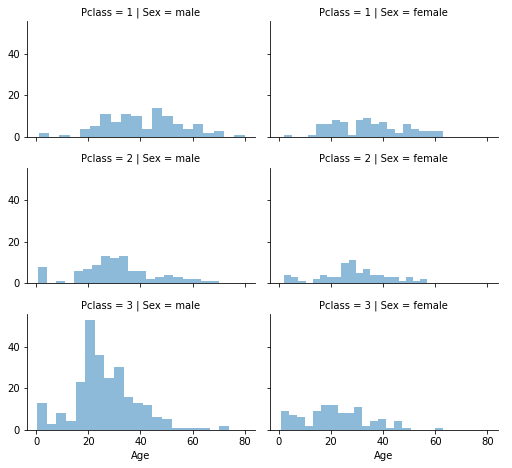

In [27]:
grid = sns.FacetGrid(train, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Let's start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.



In [28]:
guess_age=np.zeros((2,3))

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.


In [29]:
for dataset in combined:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)



In [30]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,3
1,1,1,1,38.0,1,0,71.2833,C,4
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,4
4,0,3,0,35.0,0,0,8.0500,S,3


In [31]:
 for dataset in combined:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            guess=guess_df.median()
            guess_age[i,j]=guess
            
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull())&(dataset['Sex']==i)&(dataset['Pclass']==j+1),'Age']=guess_age[i,j]
    dataset['Age']=dataset['Age'].astype(int)        
            
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    int32  
dtypes: float64(1), int32(3), int64(4), object(1)
memory usage: 52.3+ KB


We now divide the age into groups in order to minimize the numbers.

In [32]:
train['AgeRange']=pd.cut(train['Age'],5)
train[['AgeRange','Survived']].groupby('AgeRange',as_index=False).mean().sort_values(by='AgeRange')

,AgeRange,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [33]:
for dataset in combined:
    dataset.loc[dataset['Age']<=16,'Age']=1
    dataset.loc[(dataset['Age']>16)&(dataset['Age']<=32),'Age']=2
    dataset.loc[(dataset['Age']>32)&(dataset['Age']<=48),'Age']=3
    dataset.loc[(dataset['Age']>48)&(dataset['Age']<=64),'Age']=4
    dataset.loc[(dataset['Age']>64)&(dataset['Age']<=80),'Age']=5
    dataset['Age']=dataset['Age'].astype(int)
train.head()    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeRange
0,0,3,0,2,1,0,7.2500,S,3,"(16.0, 32.0]"
1,1,1,1,3,1,0,71.2833,C,4,"(32.0, 48.0]"
2,1,3,1,2,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,3,1,0,53.1000,S,4,"(32.0, 48.0]"
4,0,3,0,3,0,0,8.0500,S,3,"(32.0, 48.0]"


Now we remove the age range as it is not needed anymore

In [34]:
train=train.drop('AgeRange',axis=1)
combined=[train,test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,2,1,0,7.2500,S,3
1,1,1,1,3,1,0,71.2833,C,4
2,1,3,1,2,0,0,7.9250,S,2
3,1,1,1,3,1,0,53.1000,S,4
4,0,3,0,3,0,0,8.0500,S,3


We add the Family size instead of the Sibsp and parch features,also we may replace it with a new feature called Isalone to state if the passenger is alone or not.

And let's see the correlation with the survived feature.

In [35]:
for dataset in combined:
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1
train[['FamilySize','Survived']].groupby('FamilySize',as_index=False).mean().sort_values(by='FamilySize')    

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [36]:
for dataset in combined:
    dataset['IsAlone']=0
    dataset.loc[dataset['FamilySize']==1,'IsAlone']=1
train[['IsAlone','Survived']].groupby('IsAlone',as_index=False).mean().sort_values(by='IsAlone')      

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


We drop the unused features.

In [37]:
train=train.drop(['SibSp','Parch','FamilySize'],axis=1)
test=test.drop(['SibSp','Parch','FamilySize'],axis=1)
combined=[train,test]
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,2,7.2500,S,3,0
1,1,1,1,3,71.2833,C,4,0
2,1,3,1,2,7.9250,S,2,1
3,1,1,1,3,53.1000,S,4,0
4,0,3,0,3,8.0500,S,3,1


Let's handle the Embarked in the training set by filling the missing values with the most frequent Embarked.

In [38]:
freq=train.Embarked.dropna().mode()[0]
freq

'S'

In [39]:
train.loc[train['Embarked'].isnull(),'Embarked']=freq
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    int32  
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    object 
 6   Title     891 non-null    int32  
 7   IsAlone   891 non-null    int64  
dtypes: float64(1), int32(3), int64(3), object(1)
memory usage: 45.4+ KB


Let's convert it to numeric to make it more managable.

In [40]:
emb_map={'C':1,'S':2,'Q':3}
for dataset in combined:
    dataset['Embarked']=dataset['Embarked'].map(emb_map).astype(int)
train.head()        

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,2,7.2500,2,3,0
1,1,1,1,3,71.2833,1,4,0
2,1,3,1,2,7.9250,2,2,1
3,1,1,1,3,53.1000,2,4,0
4,0,3,0,3,8.0500,2,3,1


We notice there is a missing value of the fare in the test set so let's put it and simplyify the numbers. 

In [41]:
test['Fare'].fillna(test['Fare'].dropna().median(),inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    int32  
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    int32  
 6   Title        418 non-null    int32  
 7   IsAlone      418 non-null    int64  
dtypes: float64(1), int32(4), int64(3)
memory usage: 19.7 KB


In [42]:
train['FareRange']=pd.qcut(train['Fare'],4)
train[['FareRange','Survived']].groupby('FareRange',as_index=False).mean().sort_values(by='FareRange')

,FareRange,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [43]:
for dataset in combined:
    dataset.loc[dataset['Fare']<=7.91,'Fare']=1
    dataset.loc[(dataset['Fare']>7.91)&(dataset['Fare']<=14.454),'Fare']=2
    dataset.loc[(dataset['Fare']>14.454)&(dataset['Fare']<=31),'Fare']=3
    dataset.loc[(dataset['Fare']>31)&(dataset['Age']<=512.329),'Fare']=4
    dataset['Fare']=dataset['Fare'].astype(int)
    
train.head()    

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,FareRange
0,0,3,0,2,1,2,3,0,"(-0.001, 7.91]"
1,1,1,1,3,4,1,4,0,"(31.0, 512.329]"
2,1,3,1,2,2,2,2,1,"(7.91, 14.454]"
3,1,1,1,3,4,2,4,0,"(31.0, 512.329]"
4,0,3,0,3,2,2,3,1,"(7.91, 14.454]"


We drop the fare range.


In [44]:
train=train.drop('FareRange',axis=1)
combined=[train,test]

In [45]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,2,1,2,3,0
1,1,1,1,3,4,1,4,0
2,1,3,1,2,2,2,2,1
3,1,1,1,3,4,2,4,0
4,0,3,0,3,2,2,3,1


In [46]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,3,1,3,3,1
1,893,3,1,3,1,2,4,0
2,894,2,0,4,2,3,3,1
3,895,3,0,2,2,2,3,1
4,896,3,1,2,2,2,4,0


### Step 4: Model, predict and solve the problem

Now let's prepare the data to be entered into the model.

In [52]:
X=train.drop('Survived',axis=1).values
Y=train['Survived'].values
X_test=test.drop('PassengerId',axis=1).copy().values
X_train.shape,Y_train.shape,X_test.shape

((891, 7), (891,), (418, 7))

In [53]:
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3,random_state=42)

In [56]:
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression(penalty='l2')
cross_val_score(logreg, X_train, Y_train, cv=3, scoring="accuracy")

array([0.81730769, 0.75480769, 0.76328502])

In [57]:
logreg.fit(X_train,Y_train)
logreg_acc=round(logreg.score(X_train,Y_train)*100,2)
logreg_acc

79.13

In [58]:
Y_pred=logreg.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[136,  21],
       [ 31,  80]], dtype=int64)

In [60]:
from sklearn.metrics import precision_score, recall_score
precision_score(Y_test,Y_pred)

0.7920792079207921

In [61]:
recall_score(Y_test,Y_pred)

0.7207207207207207